In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
import os

path = os.path.join("dataset", "train.csv")

In [5]:
data = pd.read_csv(path)
data.head(3)

C:\Users\admin\AppData\Local\Temp\ipykernel_9828\3246910183.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path)


,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,11906497,away,Newell's Old Boys,River Plate,2019-12-01 00:45:00,Superliga,636,False,468196.0,468200.0,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
1,11984383,home,Real Estelí,Deportivo Las Sabanas,2019-12-01 01:00:00,Primera Division,752,False,516788.0,22169161.0,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
2,11983301,draw,UPNFM,Marathón,2019-12-01 01:00:00,Liga Nacional,734,False,2510608.0,456313.0,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0


In [6]:
data.shape

(110938, 190)

In [7]:
# No drop. Clean the dataset and fill NA vals
#data.dropna(inplace= True)
#data.shape

<AxesSubplot:>

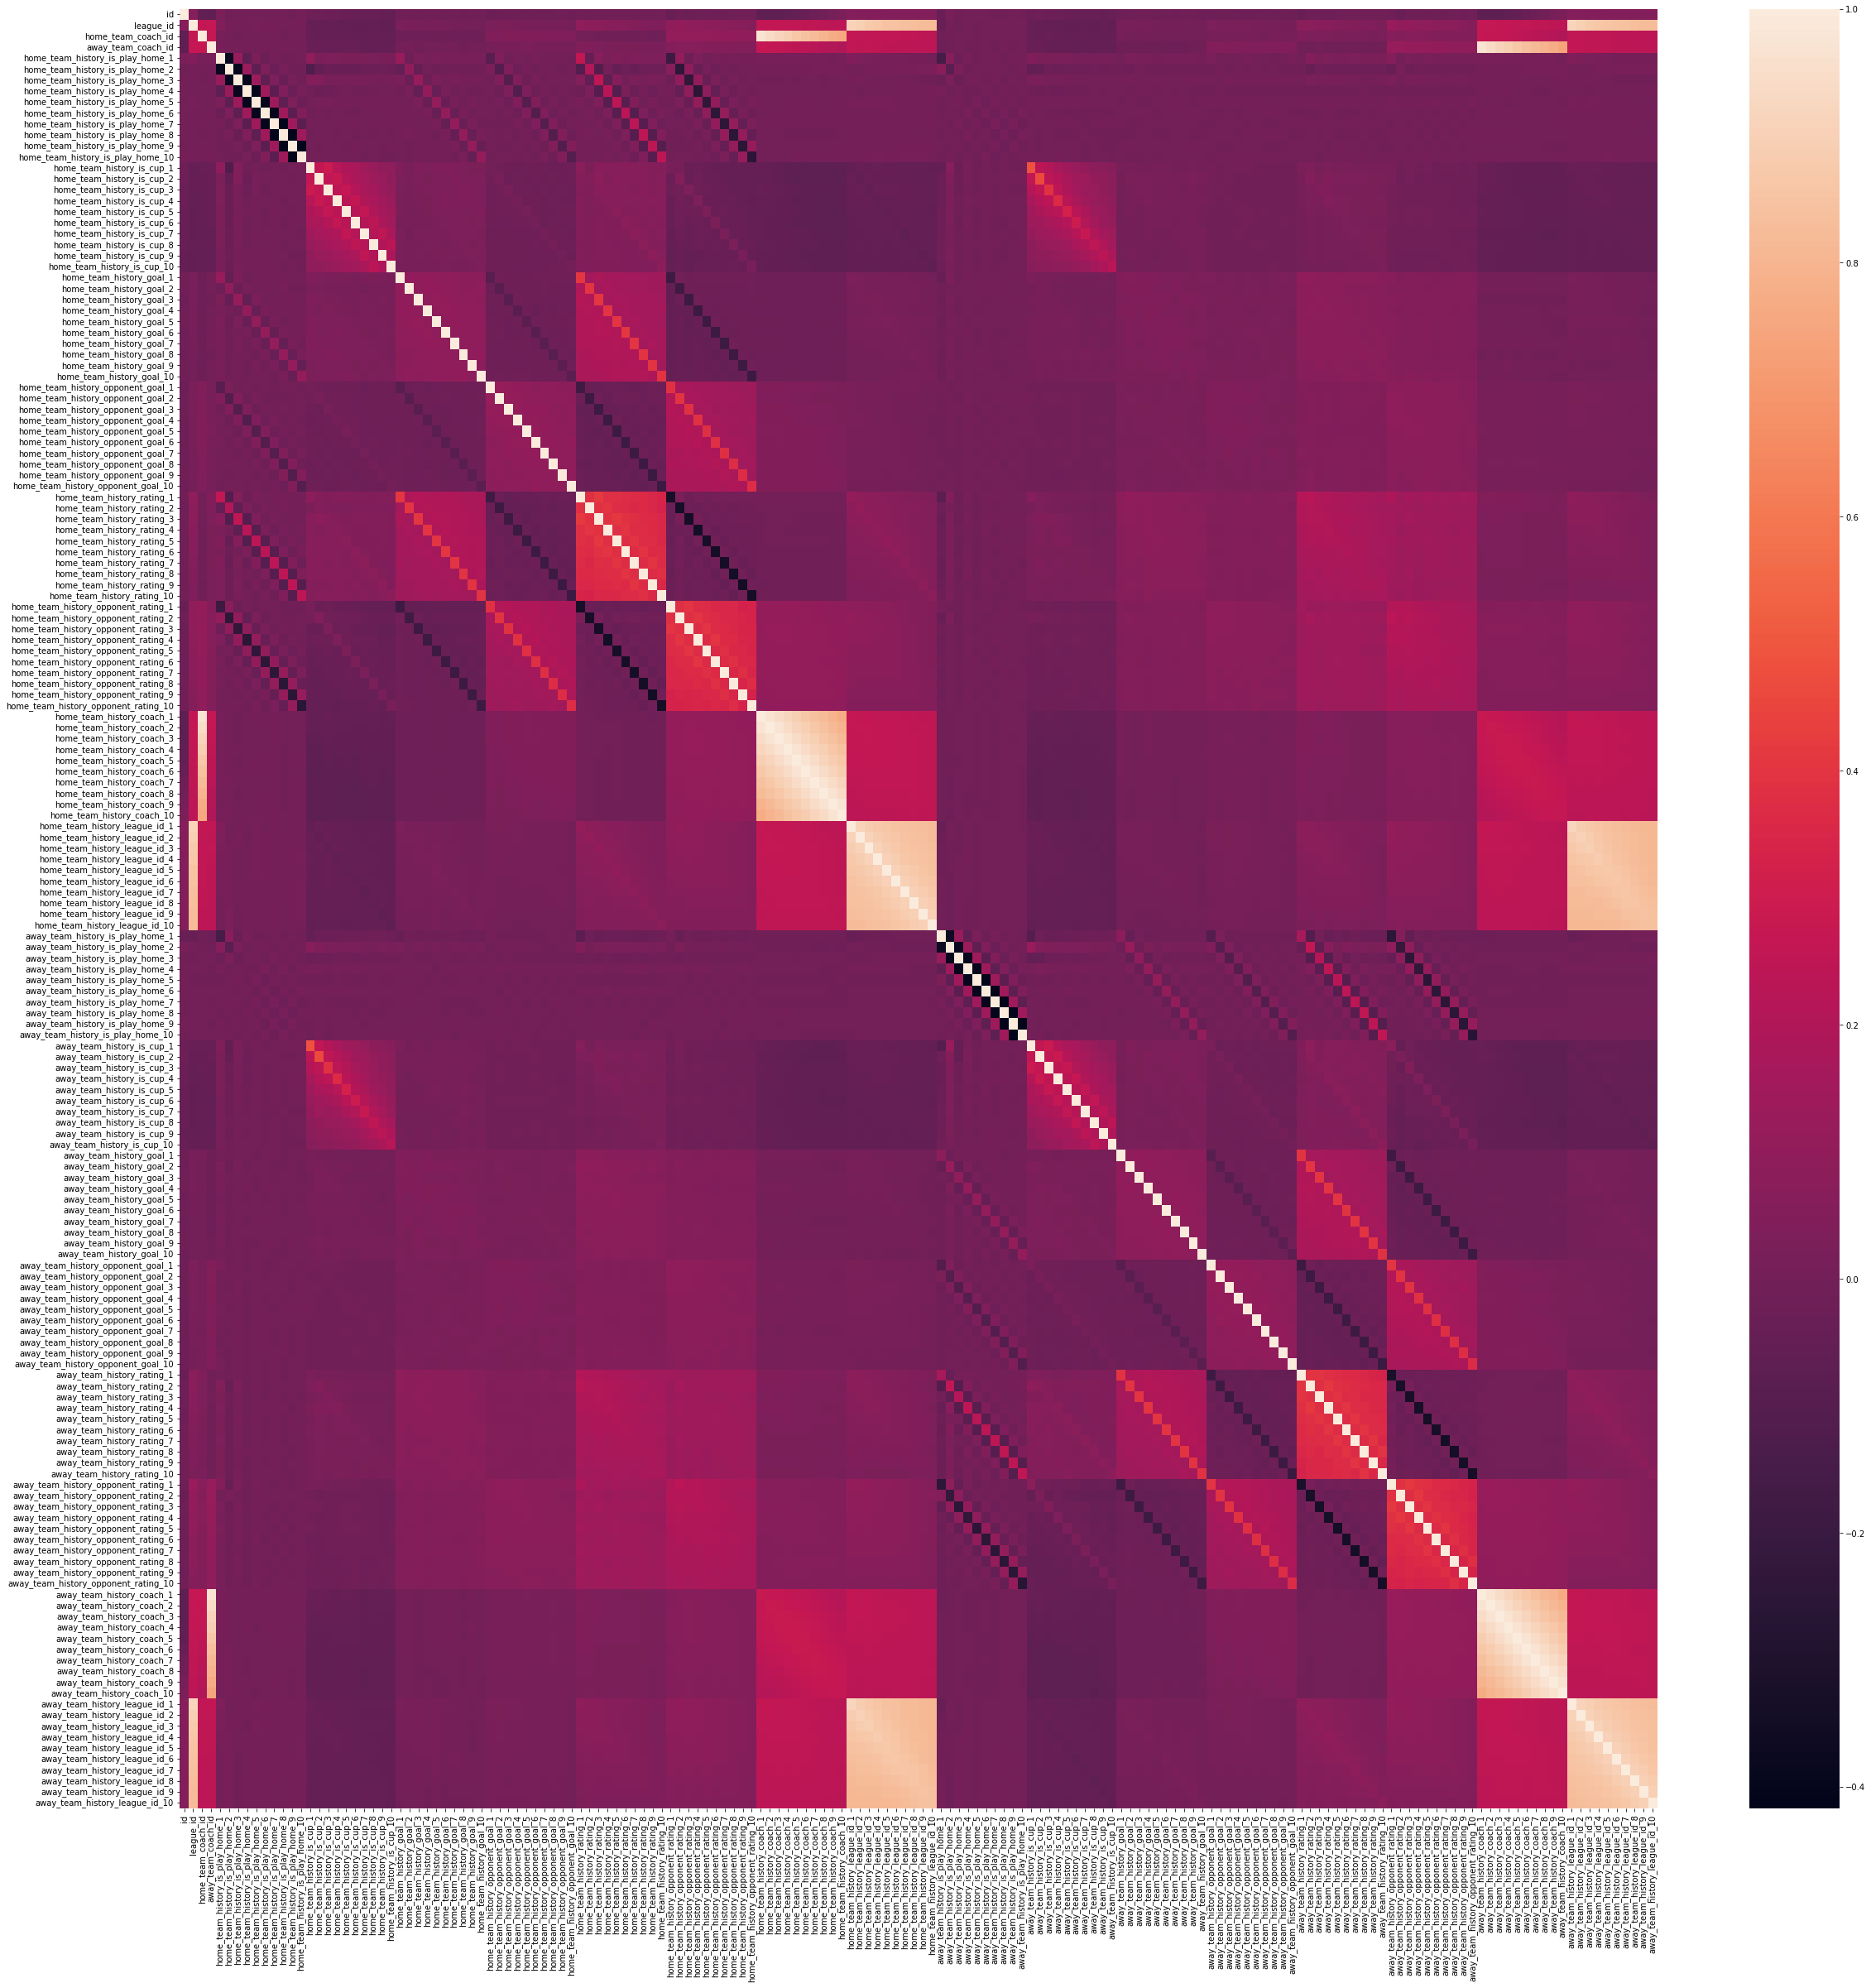

In [8]:
plt.figure(figsize= (40,40))

sns.heatmap(data.corr())

# Features in original dataset

In [9]:
for i in data.columns:
    print(i)

id
target
home_team_name
away_team_name
match_date
league_name
league_id
is_cup
home_team_coach_id
away_team_coach_id
home_team_history_match_date_1
home_team_history_match_date_2
home_team_history_match_date_3
home_team_history_match_date_4
home_team_history_match_date_5
home_team_history_match_date_6
home_team_history_match_date_7
home_team_history_match_date_8
home_team_history_match_date_9
home_team_history_match_date_10
home_team_history_is_play_home_1
home_team_history_is_play_home_2
home_team_history_is_play_home_3
home_team_history_is_play_home_4
home_team_history_is_play_home_5
home_team_history_is_play_home_6
home_team_history_is_play_home_7
home_team_history_is_play_home_8
home_team_history_is_play_home_9
home_team_history_is_play_home_10
home_team_history_is_cup_1
home_team_history_is_cup_2
home_team_history_is_cup_3
home_team_history_is_cup_4
home_team_history_is_cup_5
home_team_history_is_cup_6
home_team_history_is_cup_7
home_team_history_is_cup_8
home_team_history_is_cup

In [10]:
data = data.drop(columns= ["home_team_name", "away_team_name", "league_name"])

In [24]:
#data.isna().sum().to_excel('missing_vals.xlsx')

<AxesSubplot:xlabel='target', ylabel='Count'>

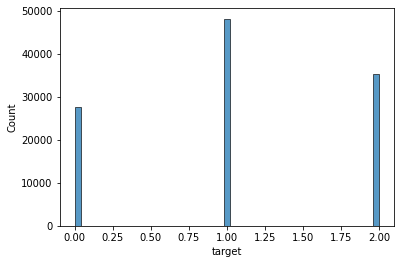

In [25]:
# "target" to categorial ['away' = 2, 'home' = 1, 'draw' = 0]

data["target"] = np.where(data["target"] == "away", 2, data["target"])
data["target"] = np.where(data["target"] == "home", 1, data["target"])
data["target"] = np.where(data["target"] == "draw", 0, data["target"])

sns.histplot(data= data["target"])

In [13]:
# date based features

for col in data.filter(regex='date', axis=1).columns:
    data[col] = pd.to_datetime(data[col])



for i in range(1, 11):
    data[f'home_team_history_match_days_ago_{i}'] = (data['match_date'] - data[f'home_team_history_match_date_{i}']).dt.days
    data[f'away_team_history_match_days_ago_{i}'] = (data['match_date'] - data[f'away_team_history_match_date_{i}']).dt.days

In [16]:
for i in range(1,11):
    data = data.drop(columns= [f'home_team_history_match_date_{i}', f'away_team_history_match_date_{i}'])

data = data.drop(columns= ['match_date'])

In [48]:
data_y = data['target']
data_y = data_y.astype('int')

data_X = data.drop(columns= 'target')

# ______________________________________________________________________________________
# Auto imputer (KNN)

In [17]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors= 24)

In [20]:
imputer.fit(data_X)

KNNImputer(n_neighbors=24)

In [21]:
clear_X = imputer.transform(data_X)

In [44]:
clear_x_csv = pd.DataFrame(clear_X)
clear_x_csv.to_csv('111.csv', header= False, index = False)

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(clear_X, data_y, test_size= 0.15)


In [50]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier

r_state = 76
models = { 'AdaBoostClassifier' : AdaBoostClassifier(random_state= r_state),
           'RandomForestClassifier': RandomForestClassifier(random_state= r_state),
           'GradientBoostingClassifier': GradientBoostingClassifier()}

In [51]:
for name, model in models.items():
    model.fit(X_train, y_train)

In [53]:
from sklearn.metrics import log_loss

In [54]:
results = pd.DataFrame(columns= ['Model', 'Score'])


for name, model in models.items():
    
    row = [ name, log_loss(y_test, model.predict_proba(X_test))]
    results.loc[len(results)] = row

results

,Model,Score
0,AdaBoostClassifier,1.095308
1,RandomForestClassifier,1.035060
2,GradientBoostingClassifier,1.012665


In [57]:
X_train.shape

(94297, 185)

In [66]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch import from_numpy

In [106]:
class CustomModel(nn.Module):

    def __init__(self):
        super(CustomModel, self).__init__()
        self.fc1 = nn.Linear(185, 220)
        self.fc2 = nn.Linear(220, 240)
        self.fc3 = nn.Linear(240, 220)
        self.fc4 = nn.Linear(220, 130)
        self.fc5 = nn.Linear(130, 50)
        self.fc6 = nn.Linear(50, 3)


    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))

        #x = F.relu(self.fc6(x))
        
        return self.fc6(x)


In [107]:
net = CustomModel()
criterion = nn.NLLLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [110]:
for epoch in range(10):  # loop over the dataset multiple times
    input = from_numpy(X_train).float()
    labels = from_numpy(np.array(y_train)).long()
    
    optimizer.zero_grad()

    outputs = net(input)
    loss = criterion(outputs, labels)

    print(f"Loss {loss}")

    loss.backward()
    optimizer.step()

    
		
print('Finished Training')

Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Finished Training


## Cleaning and visualizing usefull values

### Home team history features

### rating {i}

In [110]:
for i in range(1,11):
    print(f"home_team_history_rating_{i} NA = " + str(data[f'home_team_history_rating_{i}'].isna().sum()))

home_team_history_rating_1 NA = 1171
home_team_history_rating_2 NA = 2466
home_team_history_rating_3 NA = 3785
home_team_history_rating_4 NA = 5117
home_team_history_rating_5 NA = 6485
home_team_history_rating_6 NA = 7909
home_team_history_rating_7 NA = 9308
home_team_history_rating_8 NA = 10729
home_team_history_rating_9 NA = 12141
home_team_history_rating_10 NA = 13566


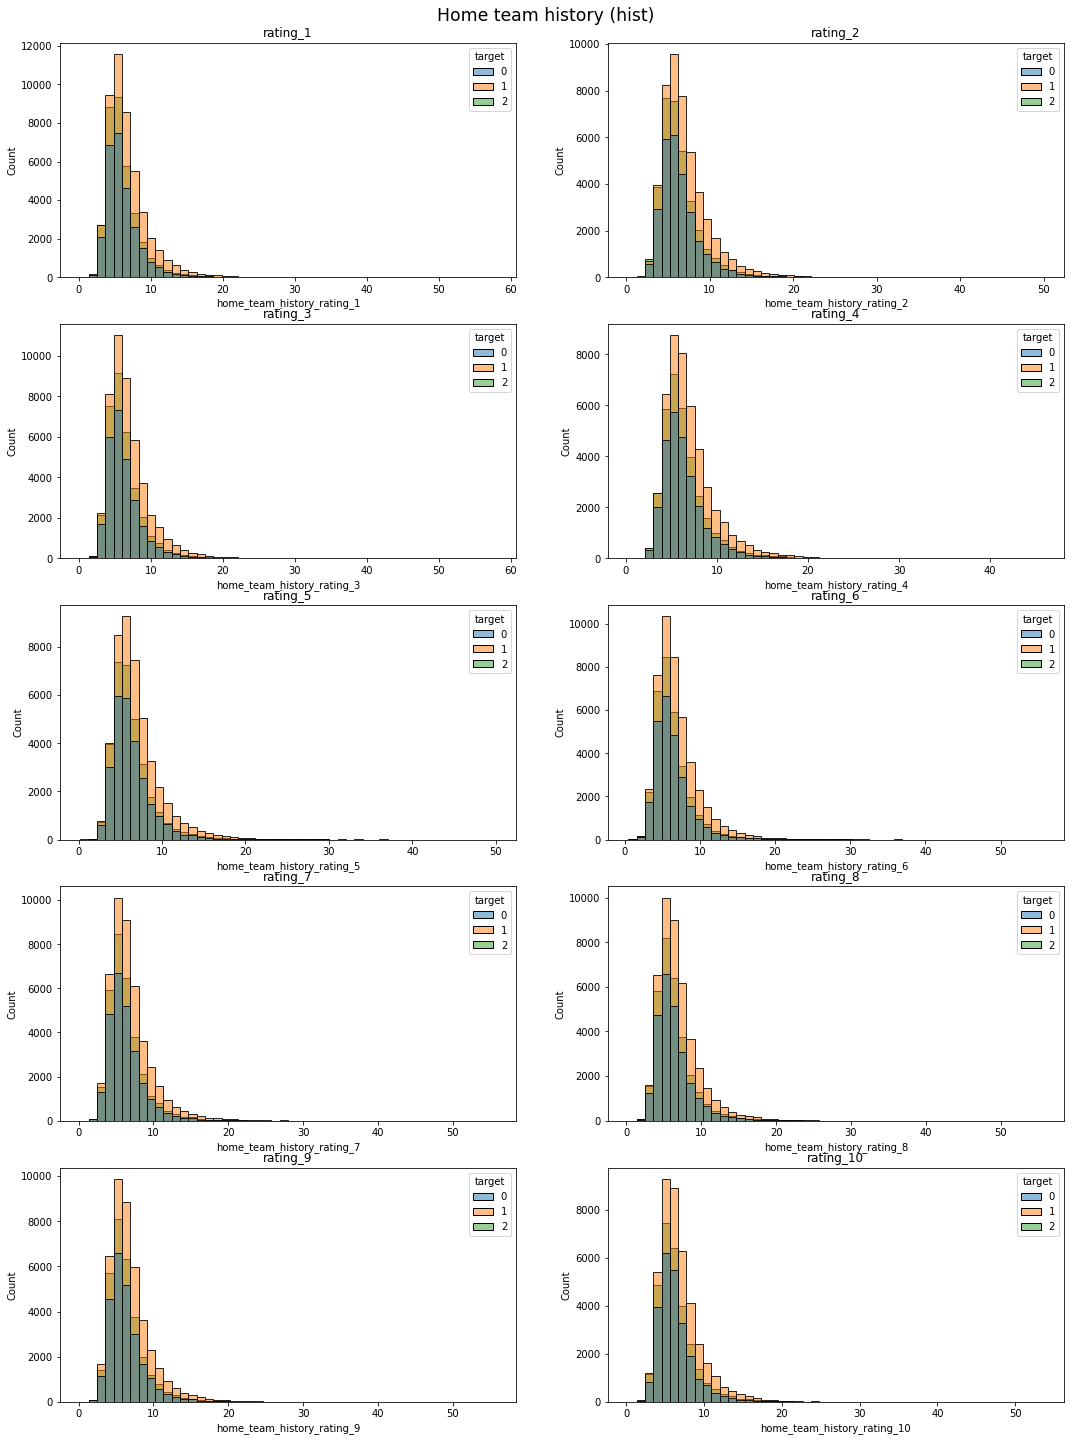

In [111]:
fig, axs = plt.subplots(5, 2, figsize= (18,25))

fig.suptitle("Home team history (hist)", size= "xx-large", y = 0.9)

cnt = 0
for i in range(0,10):
    sns.histplot(data = data, x= data[f'home_team_history_rating_{i+1}'], hue= data['target'], bins= 50, 
             palette= "tab10", ax= axs[cnt % 5][i % 2]).set_title(f'rating_{i+1}')

    if((i+1) % 2 == 0):
        cnt+=1

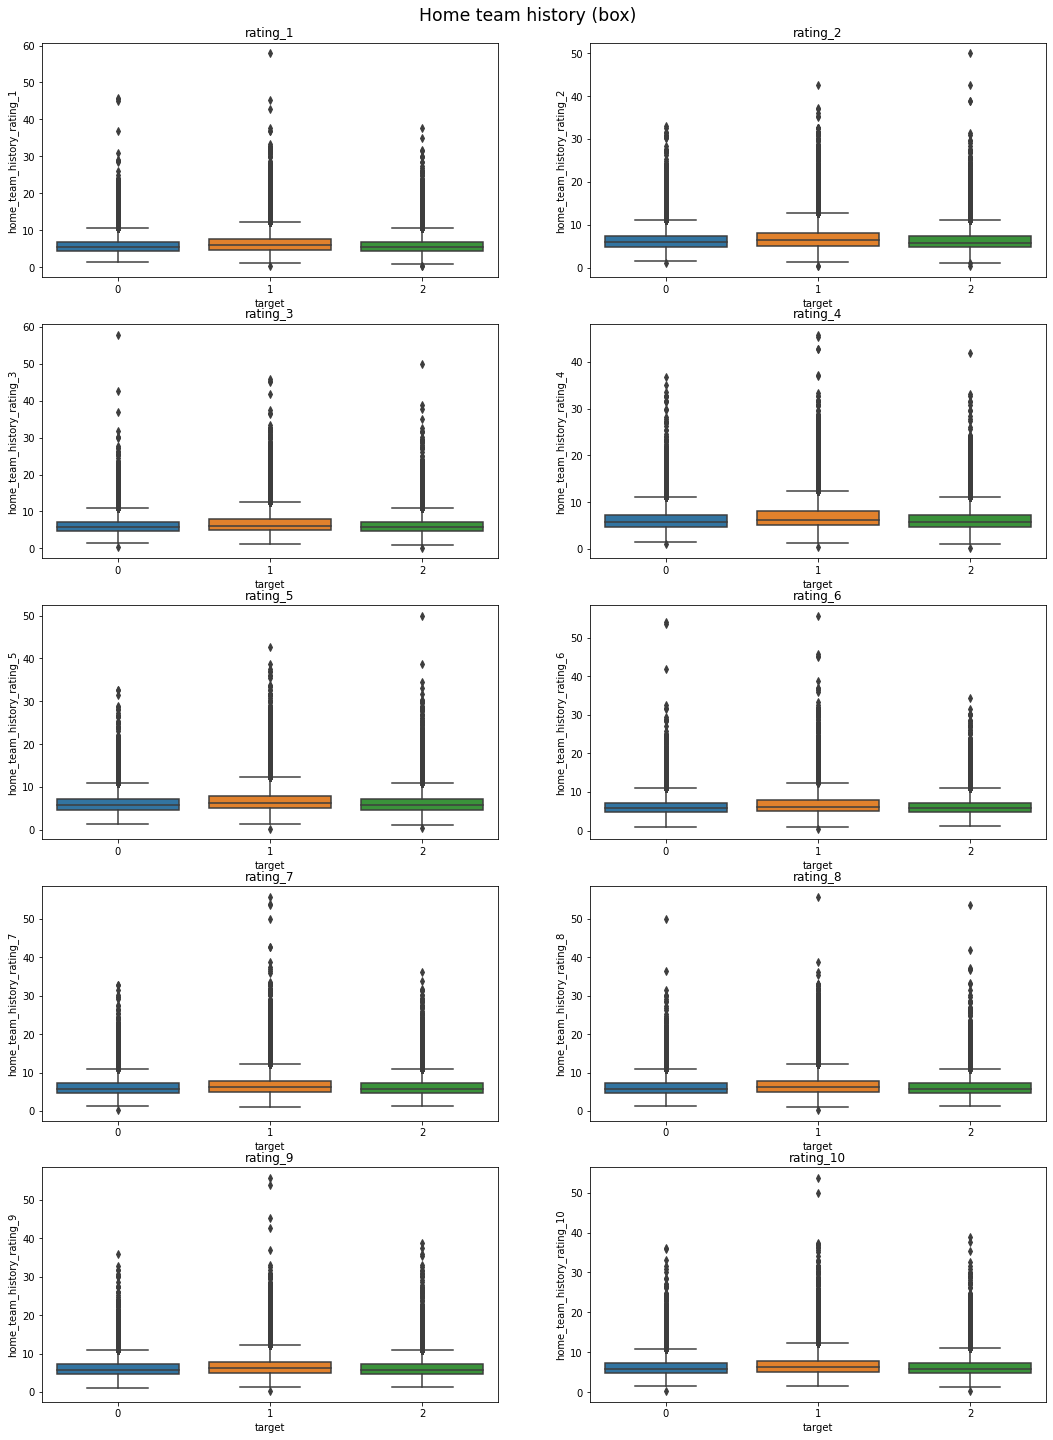

In [112]:
fig, axs = plt.subplots(5, 2, figsize= (18,25))

fig.suptitle("Home team history (box)", size= "xx-large", y = 0.9)

cnt = 0
for i in range(0,10):
    sns.boxplot(data = data, y= data[f'home_team_history_rating_{i+1}'], x= data['target'], 
             palette= "tab10", ax= axs[cnt % 5][i % 2]).set_title(f'rating_{i+1}')

    if((i+1) % 2 == 0):
        cnt+=1

In [113]:
# Median HTR array

arr_home_team_r_median = []
for i in range(1,11):
    arr_home_team_r_median.append(data[f'home_team_history_rating_{i}'].median())


In [114]:
# Fill all HTR{i} with median

for i in range(1,11):
    data[f'home_team_history_rating_{i}'] = data[f'home_team_history_rating_{i}'].fillna(arr_home_team_r_median[i-1])


for i in range(1,11):
    print(f'home_team_history_rating_{i} N_isna = ' + (str(data[f'home_team_history_rating_{i}'].isna().sum())))

home_team_history_rating_1 N_isna = 0
home_team_history_rating_2 N_isna = 0
home_team_history_rating_3 N_isna = 0
home_team_history_rating_4 N_isna = 0
home_team_history_rating_5 N_isna = 0
home_team_history_rating_6 N_isna = 0
home_team_history_rating_7 N_isna = 0
home_team_history_rating_8 N_isna = 0
home_team_history_rating_9 N_isna = 0
home_team_history_rating_10 N_isna = 0


### is_play_home

In [115]:
for i in range(1,11):
    print(f"home_team_history_is_play_home_{i} NA = " + str(data[f'home_team_history_is_play_home_{i}'].isna().sum()))

home_team_history_is_play_home_1 NA = 1159
home_team_history_is_play_home_2 NA = 2451
home_team_history_is_play_home_3 NA = 3773
home_team_history_is_play_home_4 NA = 5101
home_team_history_is_play_home_5 NA = 6477
home_team_history_is_play_home_6 NA = 7896
home_team_history_is_play_home_7 NA = 9295
home_team_history_is_play_home_8 NA = 10719
home_team_history_is_play_home_9 NA = 12136
home_team_history_is_play_home_10 NA = 13559


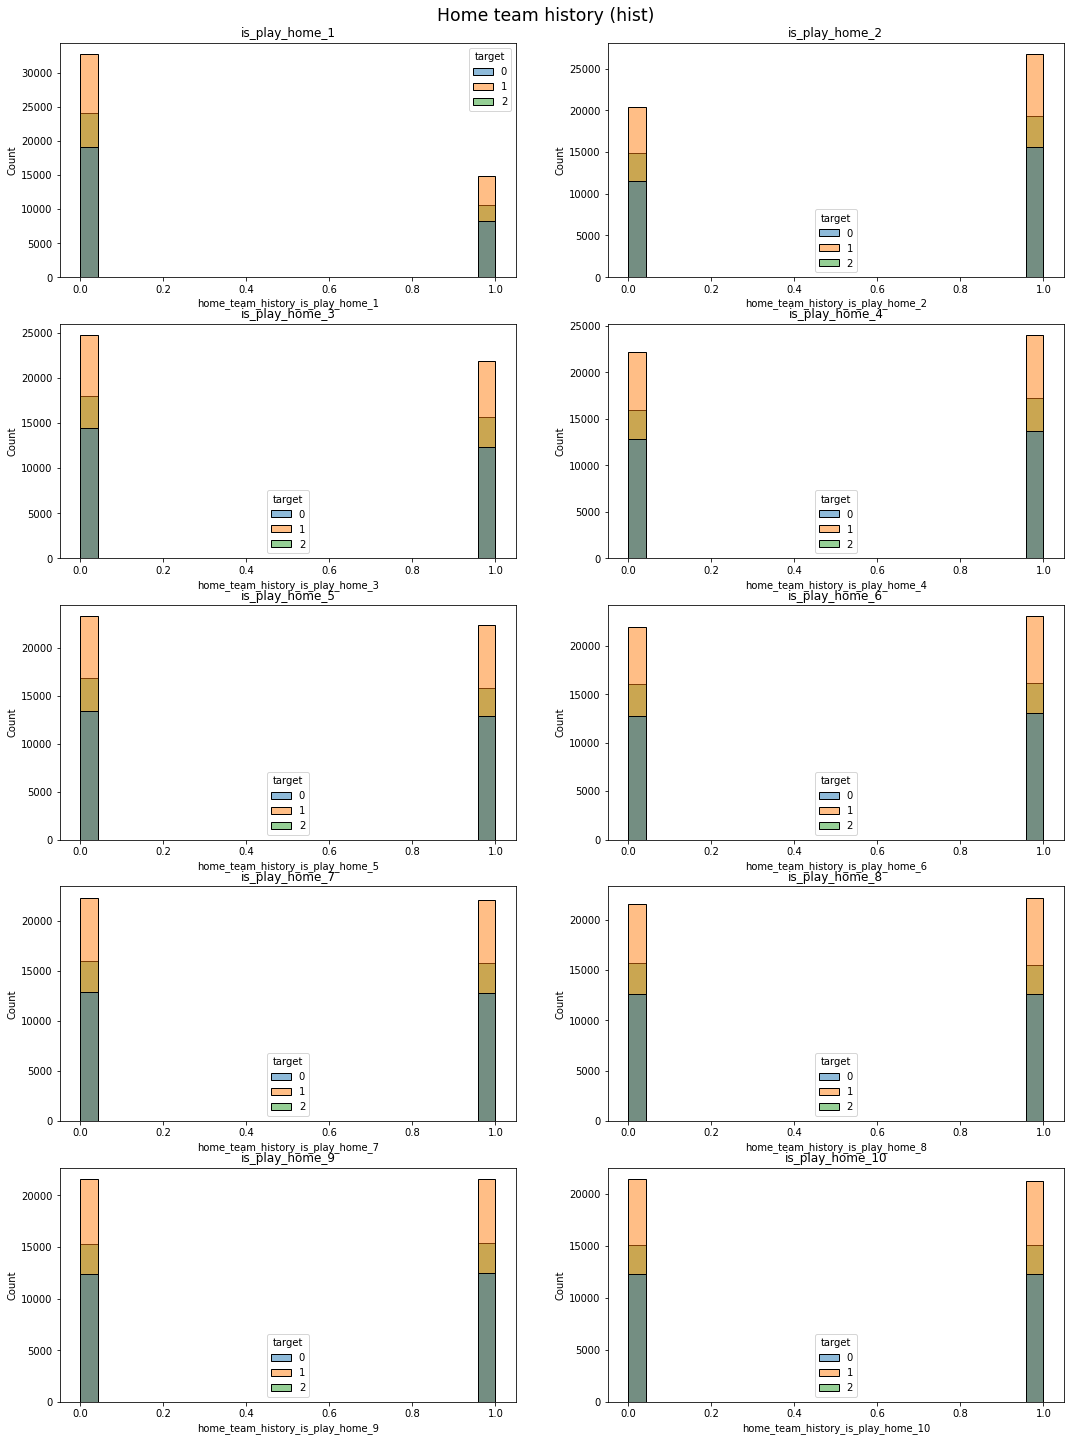

In [116]:
fig, axs = plt.subplots(5, 2, figsize= (18,25))

fig.suptitle("Home team history (hist)", size= "xx-large", y = 0.9)

cnt = 0
for i in range(0,10):
    sns.histplot(data = data, x= data[f'home_team_history_is_play_home_{i+1}'], hue= data['target'],
                 palette= "tab10", ax= axs[cnt % 5][i % 2]).set_title(f'is_play_home_{i+1}')

    if((i+1) % 2 == 0):
        cnt+=1

In [117]:
# Filling NA values with corresponding i-th mode

arr_home_is_play_home_modes = []

for i in range(1,11):
    arr_home_is_play_home_modes.append(data[f'home_team_history_is_play_home_{i}'].mode().item())


for i in range(1,11):
    data[f'home_team_history_is_play_home_{i}'] = data[f'home_team_history_is_play_home_{i}'].fillna(arr_home_is_play_home_modes[i-1])

### is_cup

In [118]:
for i in range(1,11):
    print(f"home_team_history_is_cup_{i} NA = " + str(data[f'home_team_history_is_cup_{i}'].isna().sum()))


home_team_history_is_cup_1 NA = 1213
home_team_history_is_cup_2 NA = 2557
home_team_history_is_cup_3 NA = 3913
home_team_history_is_cup_4 NA = 5299
home_team_history_is_cup_5 NA = 6748
home_team_history_is_cup_6 NA = 8231
home_team_history_is_cup_7 NA = 9720
home_team_history_is_cup_8 NA = 11263
home_team_history_is_cup_9 NA = 12730
home_team_history_is_cup_10 NA = 14186


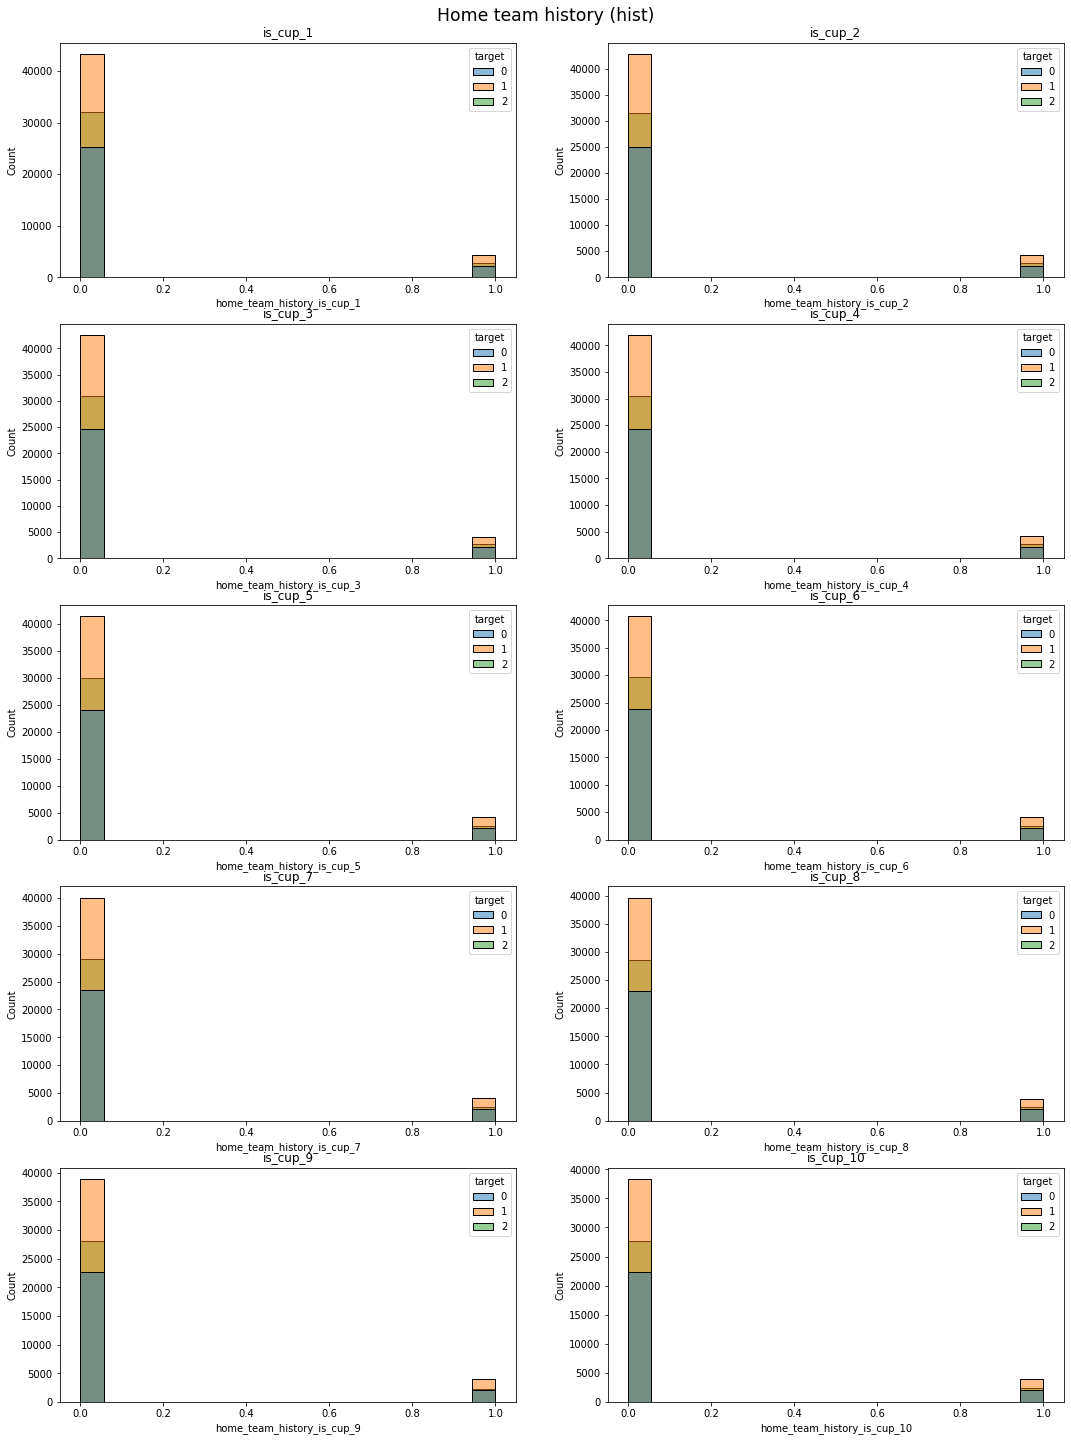

In [119]:
fig, axs = plt.subplots(5, 2, figsize= (18,25))

fig.suptitle("Home team history (hist)", size= "xx-large", y = 0.9)

cnt = 0
for i in range(0,10):
    sns.histplot(data = data, x= data[f'home_team_history_is_cup_{i+1}'], hue= data['target'],
                 palette= "tab10", ax= axs[cnt % 5][i % 2]).set_title(f'is_cup_{i+1}')

    if((i+1) % 2 == 0):
        cnt+=1

In [120]:
# Fill home_team_history_is_cup i-th with corresponding mode


arr_home_is_cup_modes = []

for i in range(1,11):
    arr_home_is_cup_modes.append(data[f'home_team_history_is_cup_{i}'].mode().item())


for i in range(1,11):
    data[f'home_team_history_is_cup_{i}'] = data[f'home_team_history_is_cup_{i}'].fillna(arr_home_is_cup_modes[i-1])

### goal

In [121]:
for i in range(1,11):
    print(f"home_team_history_goal_{i} NA = " + str(data[f'home_team_history_goal_{i}'].isna().sum()))

home_team_history_goal_1 NA = 1159
home_team_history_goal_2 NA = 2451
home_team_history_goal_3 NA = 3773
home_team_history_goal_4 NA = 5101
home_team_history_goal_5 NA = 6477
home_team_history_goal_6 NA = 7896
home_team_history_goal_7 NA = 9295
home_team_history_goal_8 NA = 10719
home_team_history_goal_9 NA = 12136
home_team_history_goal_10 NA = 13559


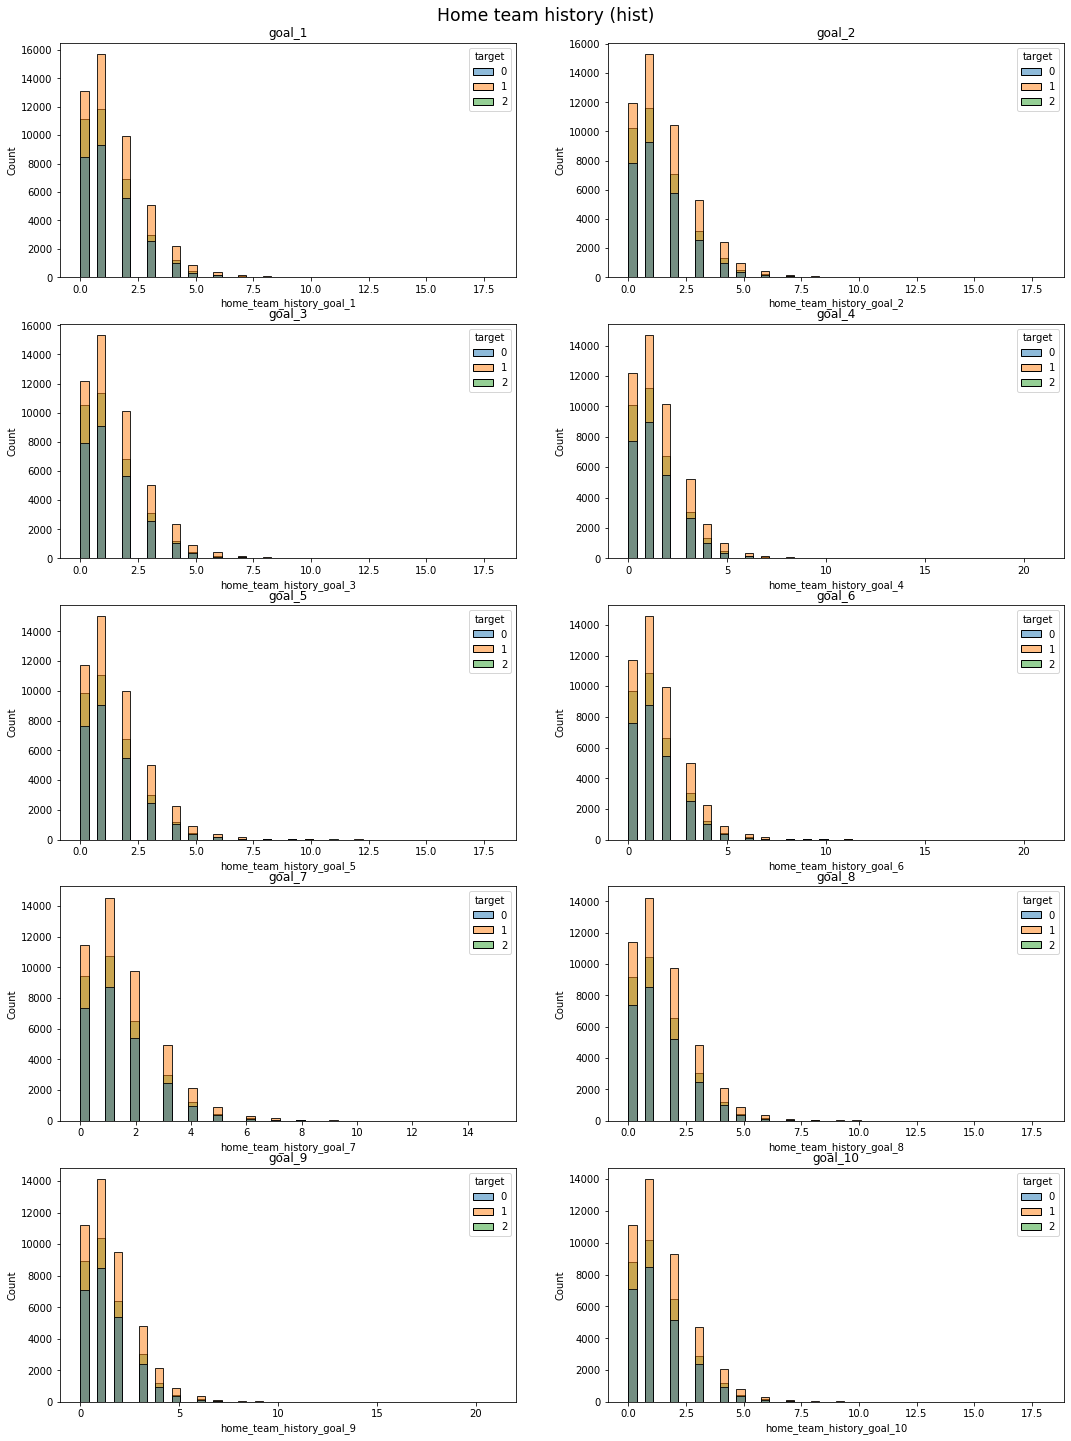

In [122]:
fig, axs = plt.subplots(5, 2, figsize= (18,25))

fig.suptitle("Home team history (hist)", size= "xx-large", y = 0.9)

cnt = 0
for i in range(0,10):
    sns.histplot(data = data, x= data[f'home_team_history_goal_{i+1}'], hue= data['target'], bins= 50, 
             palette= "tab10", ax= axs[cnt % 5][i % 2]).set_title(f'goal_{i+1}')

    if((i+1) % 2 == 0):
        cnt+=1

In [123]:
# Mean HTG array

arr_home_team_g_mean = []
for i in range(1,11):
    arr_home_team_g_mean.append(data[f'home_team_history_goal_{i}'].mean())


In [124]:
# Fill all HTG{i} with median

for i in range(1,11):
    data[f'home_team_history_goal_{i}'] = data[f'home_team_history_goal_{i}'].fillna(arr_home_team_g_mean[i-1])


for i in range(1,11):
    print(f'home_team_history_goal_{i} N_isna = ' + (str(data[f'home_team_history_goal_{i}'].isna().sum())))

home_team_history_goal_1 N_isna = 0
home_team_history_goal_2 N_isna = 0
home_team_history_goal_3 N_isna = 0
home_team_history_goal_4 N_isna = 0
home_team_history_goal_5 N_isna = 0
home_team_history_goal_6 N_isna = 0
home_team_history_goal_7 N_isna = 0
home_team_history_goal_8 N_isna = 0
home_team_history_goal_9 N_isna = 0
home_team_history_goal_10 N_isna = 0


### Away team history features

In [125]:
for i in range(1,11):
    print(f"away_team_history_rating_{i} NA = " + str(data[f'away_team_history_rating_{i}'].isna().sum()))

away_team_history_rating_1 NA = 1239
away_team_history_rating_2 NA = 2603
away_team_history_rating_3 NA = 4047
away_team_history_rating_4 NA = 5525
away_team_history_rating_5 NA = 7016
away_team_history_rating_6 NA = 8437
away_team_history_rating_7 NA = 9878
away_team_history_rating_8 NA = 11303
away_team_history_rating_9 NA = 12772
away_team_history_rating_10 NA = 14223


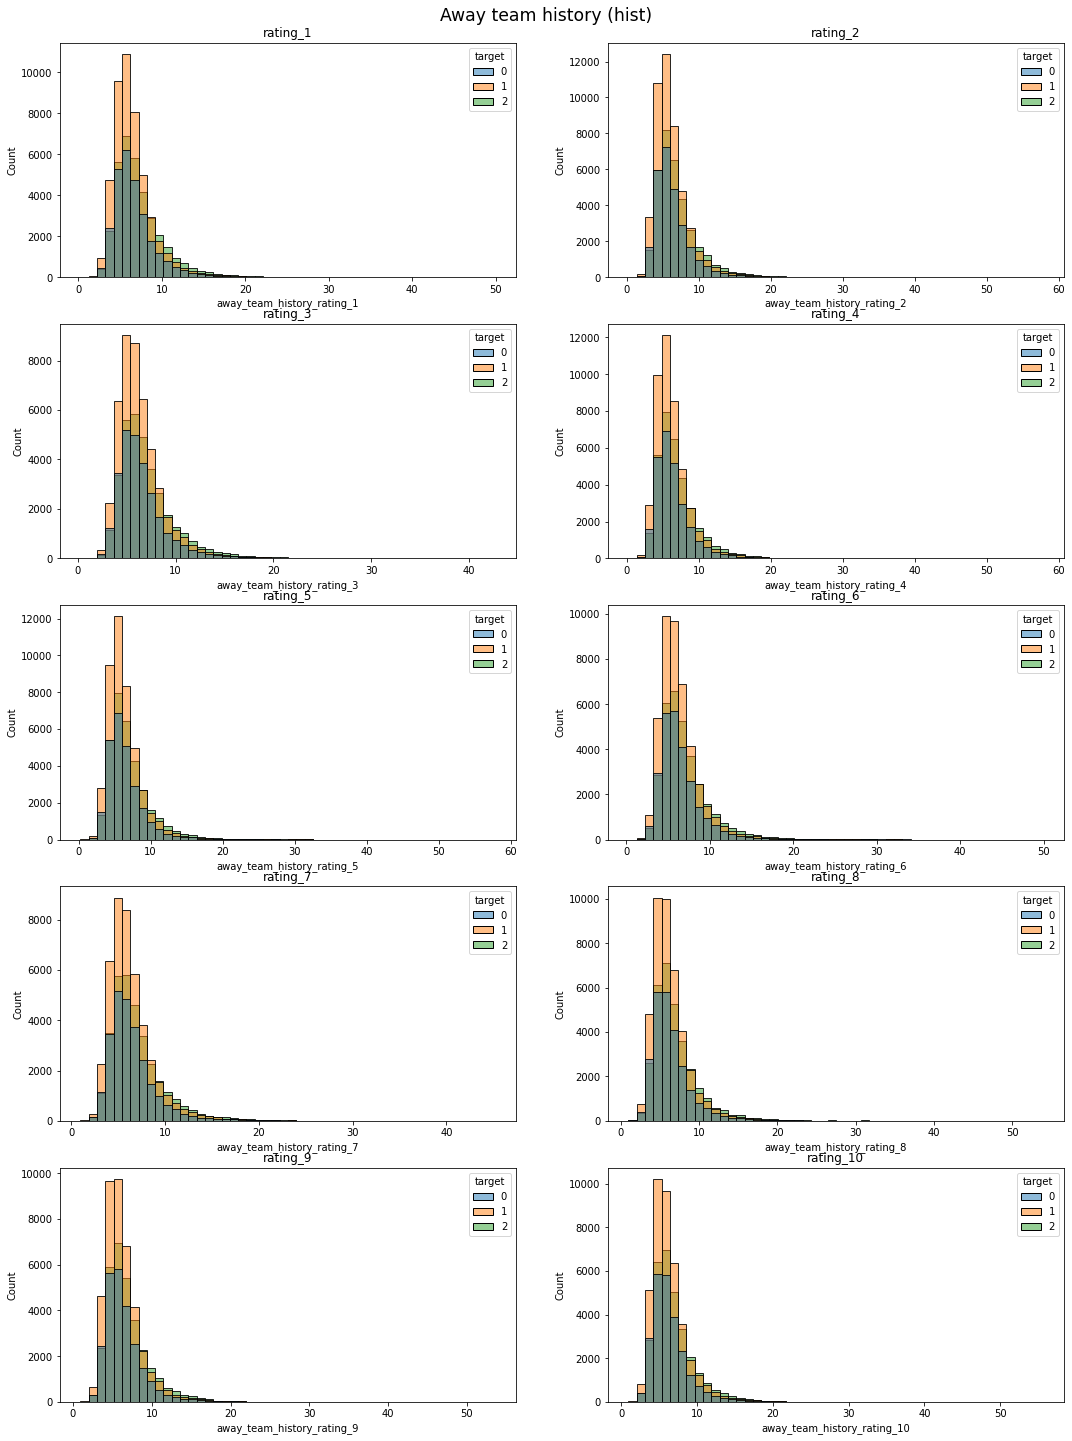

In [126]:
fig, axs = plt.subplots(5, 2, figsize= (18,25))

fig.suptitle("Away team history (hist)", size= "xx-large", y = 0.9)

cnt = 0
for i in range(0,10):
    sns.histplot(data = data, x= data[f'away_team_history_rating_{i+1}'], hue= data['target'], bins= 50, 
             palette= "tab10", ax= axs[cnt % 5][i % 2]).set_title(f'rating_{i+1}')

    if((i+1) % 2 == 0):
        cnt+=1

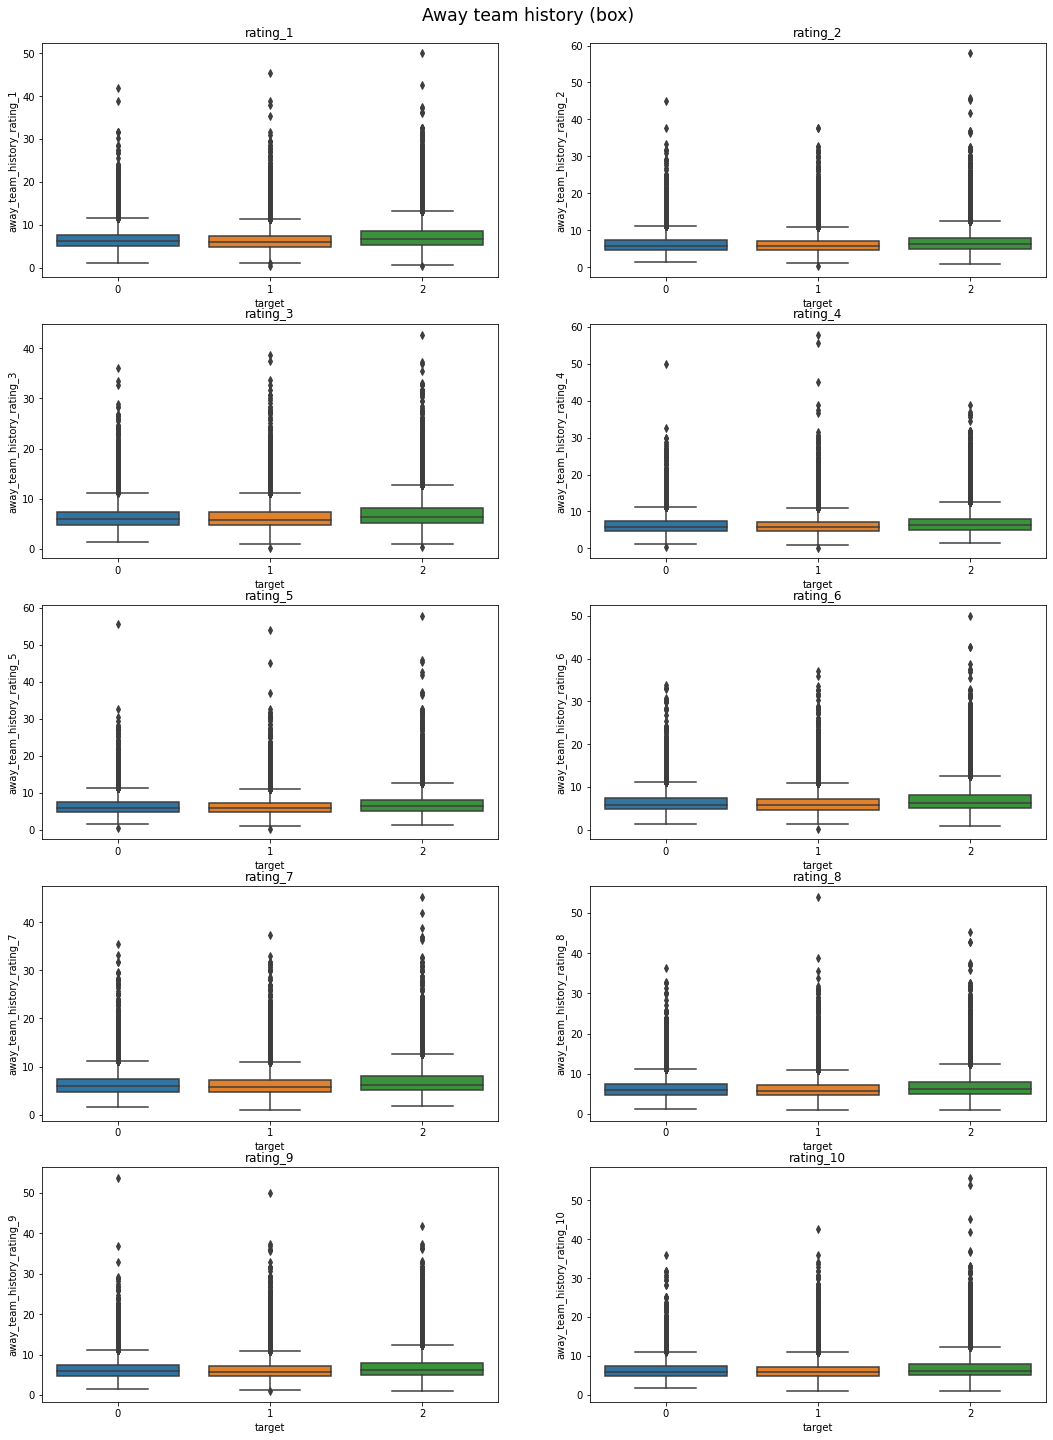

In [127]:
fig, axs = plt.subplots(5, 2, figsize= (18,25))

fig.suptitle("Away team history (box)", size= "xx-large", y = 0.9)

cnt = 0
for i in range(0,10):
    sns.boxplot(data = data, y= data[f'away_team_history_rating_{i+1}'], x= data['target'], 
             palette= "tab10", ax= axs[cnt % 5][i % 2]).set_title(f'rating_{i+1}')

    if((i+1) % 2 == 0):
        cnt+=1

In [128]:
# Median ATR array

arr_away_team_r_median = []
for i in range(1,11):
    arr_away_team_r_median.append(data[f'away_team_history_rating_{i}'].median())


In [129]:
# Fill all ATR{i} with median

for i in range(1,11):
    data[f'away_team_history_rating_{i}'] = data[f'away_team_history_rating_{i}'].fillna(arr_away_team_r_median[i-1])


for i in range(1,11):
    print(f'away_team_history_rating_{i} N_isna = ' + (str(data[f'away_team_history_rating_{i}'].isna().sum())))

away_team_history_rating_1 N_isna = 0
away_team_history_rating_2 N_isna = 0
away_team_history_rating_3 N_isna = 0
away_team_history_rating_4 N_isna = 0
away_team_history_rating_5 N_isna = 0
away_team_history_rating_6 N_isna = 0
away_team_history_rating_7 N_isna = 0
away_team_history_rating_8 N_isna = 0
away_team_history_rating_9 N_isna = 0
away_team_history_rating_10 N_isna = 0


### Conclusion (NA values team_rating)
    As seen, all team ratings homogeneous. So fill them with corresponding median.
    (IMPORTANT: fill the test set with the same corresponding median for each i-th rating)

In [130]:
# read the test dataset

test_set = pd.read_csv(os.path.join('dataset', 'test.csv'))

In [131]:
# Fill test set with corresponding i-th median

for i in range(1,11):
    test_set[f'home_team_history_rating_{i}'] = test_set[f'home_team_history_rating_{i}'].fillna(arr_home_team_r_median[i-1])

for i in range(1,11):
    test_set[f'away_team_history_rating_{i}'] = test_set[f'away_team_history_rating_{i}'].fillna(arr_away_team_r_median[i-1])


# Print result of filling NA values


for i in range(1,11):
    print(f'home_team_history_rating_{i} N_isna = ' + (str(test_set[f'home_team_history_rating_{i}'].isna().sum())))

print("##############################################################")

for i in range(1,11):
    print(f'away_team_history_rating_{i} N_isna = ' + (str(test_set[f'away_team_history_rating_{i}'].isna().sum())))


home_team_history_rating_1 N_isna = 0
home_team_history_rating_2 N_isna = 0
home_team_history_rating_3 N_isna = 0
home_team_history_rating_4 N_isna = 0
home_team_history_rating_5 N_isna = 0
home_team_history_rating_6 N_isna = 0
home_team_history_rating_7 N_isna = 0
home_team_history_rating_8 N_isna = 0
home_team_history_rating_9 N_isna = 0
home_team_history_rating_10 N_isna = 0
##############################################################
away_team_history_rating_1 N_isna = 0
away_team_history_rating_2 N_isna = 0
away_team_history_rating_3 N_isna = 0
away_team_history_rating_4 N_isna = 0
away_team_history_rating_5 N_isna = 0
away_team_history_rating_6 N_isna = 0
away_team_history_rating_7 N_isna = 0
away_team_history_rating_8 N_isna = 0
away_team_history_rating_9 N_isna = 0
away_team_history_rating_10 N_isna = 0


## Match date to categorial -- (0 - winter, 1 - spring, 2 - summer, 3 - fall)
## --------- time of the match (0 - morning, 1 - lunch, 2 - evening, 3 - night)

In [132]:
m_dates = data['match_date'].values

seasons_ids = []
time_ids = []

for date_time in m_dates:
    date, time = date_time.split(" ")

    # date to categorial
    if ( (date[5:7] == '12') | (date[5:7] < '03')):
        date = 0

    elif ( (date[5:7] >= '03') & (date[5:7] < '06')):
        date = 1

    elif ( (date[5:7] >= '06') & (date[5:7] < '09')):
        date = 2

    elif ( (date[5:7] >= '09') & (date[5:7] < '12')):
        date = 3


    # time to categorial
    if ( (time >= '06:00:00') & (time < '12:00:00')):
        time = 0

    elif ( (time >= '12:00:00') & (time < '18:00:00')):
        time = 1

    elif ( (time >= '18:00:00') & (time < '24:00:00')):
        time = 2

    elif ( (time >= '00:00:00') & (time < '06:00:00')):
        time = 3

    seasons_ids.append(date)
    time_ids.append(time)


data['season_id'] = seasons_ids
data['time_id'] = time_ids    

data = data.drop(columns= ['match_date'])


### Same procedure with test_set

In [133]:
test_set.head(3)

,id,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,17761448,12 de Octubre,Sportivo Luqueño,2021-05-01 00:15:00,Division 1,755,False,9605704.0,30866250.0,2021-04-28 00:30:00,...,755.0,755.0,755.0,755.0,755.0,755.0,755.0,755.0,755.0,755.0
1,17695487,Necaxa,Atlas,2021-05-01 00:30:00,Liga MX,743,False,10319425.0,460370.0,2021-04-24 02:06:00,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0
2,17715496,Sertãozinho,EC São Bernardo,2021-05-01 01:00:00,Paulista A2,1314,False,440905.0,220998.0,2021-04-28 23:00:00,...,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1315.0,1315.0


In [134]:
m_dates = test_set['match_date'].values

seasons_ids = []
time_ids = []

for date_time in m_dates:
    date, time = date_time.split(" ")

    # date to categorial
    if ( (date[5:7] == '12') | (date[5:7] < '03')):
        date = 0

    elif ( (date[5:7] >= '03') & (date[5:7] < '06')):
        date = 1

    elif ( (date[5:7] >= '06') & (date[5:7] < '09')):
        date = 2

    elif ( (date[5:7] >= '09') & (date[5:7] < '12')):
        date = 3


    # time to categorial
    if ( (time >= '06:00:00') & (time < '12:00:00')):
        time = 0

    elif ( (time >= '12:00:00') & (time < '18:00:00')):
        time = 1

    elif ( (time >= '18:00:00') & (time < '24:00:00')):
        time = 2

    elif ( (time >= '00:00:00') & (time < '06:00:00')):
        time = 3

    seasons_ids.append(date)
    time_ids.append(time)


test_set['season_id'] = seasons_ids
test_set['time_id'] = time_ids    

test_set = test_set.drop(columns= ['match_date'])

# -----------------------------------------------------------------

# Try not all features

In [135]:
train_set = data[['home_team_history_is_play_home_1',
'home_team_history_is_play_home_2',
'home_team_history_is_play_home_3',
'home_team_history_is_play_home_4',
'home_team_history_is_play_home_5',
'home_team_history_is_play_home_6',
'home_team_history_is_play_home_7',
'home_team_history_is_play_home_8',
'home_team_history_is_play_home_9',
'home_team_history_is_play_home_10',
'home_team_history_is_cup_1',
'home_team_history_is_cup_2',
'home_team_history_is_cup_3',
'home_team_history_is_cup_4',
'home_team_history_is_cup_5',
'home_team_history_is_cup_6',
'home_team_history_is_cup_7',
'home_team_history_is_cup_8',
'home_team_history_is_cup_9',
'home_team_history_is_cup_10',
'home_team_history_goal_1',
'home_team_history_goal_2',
'home_team_history_goal_3',
'home_team_history_goal_4',
'home_team_history_goal_5',
'home_team_history_goal_6',
'home_team_history_goal_7',
'home_team_history_goal_8',
'home_team_history_goal_9',
'home_team_history_goal_10',
'home_team_history_rating_1',
'home_team_history_rating_2',
'home_team_history_rating_3',
'home_team_history_rating_4',
'home_team_history_rating_5',
'home_team_history_rating_6',
'home_team_history_rating_7',
'home_team_history_rating_8',
'home_team_history_rating_9',
'home_team_history_rating_10',
'season_id',
'time_id',
'away_team_history_rating_1',
'away_team_history_rating_2',
'away_team_history_rating_3',
'away_team_history_rating_4',
'away_team_history_rating_5',
'away_team_history_rating_6',
'away_team_history_rating_7',
'away_team_history_rating_8',
'away_team_history_rating_9',
'away_team_history_rating_10',
'target'
]]

# Models try

In [137]:
# auto nan imputer

from verstack import NaNImputer

imputer = NaNImputer()


d:\Projects\Python\-KAGGLE-Football-Match-Probability-Prediction\.venv\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


NaNImputer(conservative = False, n_feats = 10,            
           fix_string_nans = True, verbose = True,                
           multiprocessing_load = 3, fill_nans_in_pure_text = True,                    
           drop_empty_cols = True, drop_nan_cols_with_constant = True                        
           feature_selection = correlation)


In [123]:
data_withot_nans = imputer.impute(data)


Dataset dimensions:
 - rows:         110938
 - columns:      188
 - mb in memory: 159.12
 - NaN cols num: 163
--------------------------
Changed (fixed) column target to type float
Incorrectly represented values replaced by np.nan

Changed (fixed) column is_cup to type float
Incorrectly represented values replaced by np.nan

Changed (fixed) column time_id to type float
Incorrectly represented values replaced by np.nan


Deploy multiprocessing with 16 parallel proceses


NaNs imputation time: 0.37 minutes
--------------------------------------------------


In [124]:
test_withot_nans = imputer.impute(test_set)


Dataset dimensions:
 - rows:         72711
 - columns:      190
 - mb in memory: 104.92
 - NaN cols num: 162
--------------------------
Changed (fixed) column time_id to type float
Incorrectly represented values replaced by np.nan


Deploy multiprocessing with 16 parallel proceses


NaNs imputation time: 0.23 minutes
--------------------------------------------------


In [136]:
data_withot_nans.isna().sum() 

id                                    0
target                                0
league_id                             0
is_cup                                1
home_team_coach_id                21721
                                  ...  
away_team_history_league_id_8     11295
away_team_history_league_id_9     12762
away_team_history_league_id_10    14216
season_id                             0
time_id                           24007
Length: 188, dtype: int64

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

In [144]:
y = train_set['target']
y = y.astype('int') # it's important

X = train_set.drop(columns= ['target'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.10, random_state= 117)

In [145]:
y_train.unique()

array([2, 1, 0])

In [146]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier

r_state = 76
models = { 'AdaBoostClassifier' : AdaBoostClassifier(random_state= r_state),
           'RandomForestClassifier': RandomForestClassifier(random_state= r_state),
           'GradientBoostingClassifier': GradientBoostingClassifier()}

In [147]:
for name, model in models.items():
    model.fit(X_train, y_train)

In [148]:
results = pd.DataFrame(columns= ['Model', 'Score'])


for name, model in models.items():
    
    row = [ name, log_loss(y_test, model.predict_proba(X_test))]
    results.loc[len(results)] = row

results

,Model,Score
0,AdaBoostClassifier,1.095771
1,RandomForestClassifier,1.042280
2,GradientBoostingClassifier,1.030051


# Submission

In [149]:
test_set = test_set[['home_team_history_is_play_home_1',
'home_team_history_is_play_home_2',
'home_team_history_is_play_home_3',
'home_team_history_is_play_home_4',
'home_team_history_is_play_home_5',
'home_team_history_is_play_home_6',
'home_team_history_is_play_home_7',
'home_team_history_is_play_home_8',
'home_team_history_is_play_home_9',
'home_team_history_is_play_home_10',
'home_team_history_is_cup_1',
'home_team_history_is_cup_2',
'home_team_history_is_cup_3',
'home_team_history_is_cup_4',
'home_team_history_is_cup_5',
'home_team_history_is_cup_6',
'home_team_history_is_cup_7',
'home_team_history_is_cup_8',
'home_team_history_is_cup_9',
'home_team_history_is_cup_10',
'home_team_history_goal_1',
'home_team_history_goal_2',
'home_team_history_goal_3',
'home_team_history_goal_4',
'home_team_history_goal_5',
'home_team_history_goal_6',
'home_team_history_goal_7',
'home_team_history_goal_8',
'home_team_history_goal_9',
'home_team_history_goal_10',
'home_team_history_rating_1',
'home_team_history_rating_2',
'home_team_history_rating_3',
'home_team_history_rating_4',
'home_team_history_rating_5',
'home_team_history_rating_6',
'home_team_history_rating_7',
'home_team_history_rating_8',
'home_team_history_rating_9',
'home_team_history_rating_10',
'season_id',
'time_id',
'away_team_history_rating_1',
'away_team_history_rating_2',
'away_team_history_rating_3',
'away_team_history_rating_4',
'away_team_history_rating_5',
'away_team_history_rating_6',
'away_team_history_rating_7',
'away_team_history_rating_8',
'away_team_history_rating_9',
'away_team_history_rating_10',
'id'
]]

In [150]:
test_set.isna().sum()

home_team_history_is_play_home_1      498
home_team_history_is_play_home_2     1082
home_team_history_is_play_home_3     1678
home_team_history_is_play_home_4     2263
home_team_history_is_play_home_5     2852
home_team_history_is_play_home_6     3437
home_team_history_is_play_home_7     4085
home_team_history_is_play_home_8     4766
home_team_history_is_play_home_9     5402
home_team_history_is_play_home_10    6064
home_team_history_is_cup_1            506
home_team_history_is_cup_2           1100
home_team_history_is_cup_3           1695
home_team_history_is_cup_4           2278
home_team_history_is_cup_5           2884
home_team_history_is_cup_6           3480
home_team_history_is_cup_7           4148
home_team_history_is_cup_8           4838
home_team_history_is_cup_9           5481
home_team_history_is_cup_10          6166
home_team_history_goal_1              498
home_team_history_goal_2             1082
home_team_history_goal_3             1678
home_team_history_goal_4          

In [ ]:
test_set